In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
  

In [6]:
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')


/Users/halimahabubakar-sidiq/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [7]:

    df = df2.append(df2)



/var/folders/y9/y4qp_3md7_7c7l93svwjmbd40000gn/T/ipykernel_18855/1452064867.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df2.append(df2)


In [8]:

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

/Users/halimahabubakar-sidiq/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948429e+07,1.948429e+07,False,NaN,1,NaN,NaN,None,2023-09-13T16:58:00.000Z,26296.988625,1.404197e+10,-23.3240,0.182767,0.753782,2.749479,-11.236226,-13.187124,5.358645,5.123782e+11,49.0868,5.522368e+11,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202223e+08,1.202223e+08,True,NaN,2,NaN,NaN,None,2023-09-13T16:58:00.000Z,1610.364271,5.213143e+09,-30.0089,0.147642,0.765476,-0.804360,-13.038560,-16.677085,-1.700914,1.936017e+11,18.5484,1.936017e+11,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
2,825,Tether USDt,USDT,tether,61938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.303173e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.000106,2.153354e+10,-19.9341,0.011909,0.005531,0.065716,0.105639,-0.027863,0.113725,8.304054e+10,7.9578,8.544627e+10,None,2023-09-13T16:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-13 16:59:26.555768
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538488e+08,1.538488e+08,False,NaN,4,NaN,NaN,None,2023-09-13T16:58:00.000Z,212.713293,3.612453e+08,-19.4735,0.071719,0.302312,-0.293482,-11.685256,-15.053268,-8.396819,3.272569e+10,3.1353,3.272569e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
4,3408,USD Coin,USDC,usd-coin,14063,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.612928e+10,2.612928e+10,False,NaN,5,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.000222,3.386250e+09,-25.1478,0.007925,0.005499,0.018776,0.009349,0.019719,0.005625,2.613509e+10,2.5045,2.613509e+10,None,2023-09-13T16:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-13 16:59:26.555768
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.483583,9.473210e+08,-10.5411,0.079716,0.249441,-2.834420,-23.347785,-31.587013,1.998559,2.567007e+10,2.4600,4.835831e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509818e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.249282,1.113718e+08,-13.2600,0.163117,0.345810,-2.294590,-14.547175,-24.319897,-2.944987,8.749344e+09,0.8384,1.121769e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409924e+11,1.409924e+11,True,NaN,8,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.061383,1.958910e+08,-20.3521,0.168969,-0.173278,-2.912203,-17.908501,-15.905872,0.969053,8.654525e+09,0.8294,8.654525e+09,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
8,5426,Solana,SOL,solana,506,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x11d37cfa0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
API Runner completed
HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x11d37cfd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
API Runner completed
HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnec

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948429e+07,1.948429e+07,False,NaN,1,NaN,NaN,None,2023-09-13T16:58:00.000Z,26296.988625,1.404197e+10,-23.3240,0.182767,0.753782,2.749479,-11.236226,-13.187124,5.358645,5.123782e+11,49.0868,5.522368e+11,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202223e+08,1.202223e+08,True,NaN,2,NaN,NaN,None,2023-09-13T16:58:00.000Z,1610.364271,5.213143e+09,-30.0089,0.147642,0.765476,-0.804360,-13.038560,-16.677085,-1.700914,1.936017e+11,18.5484,1.936017e+11,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
2,825,Tether USDt,USDT,tether,61938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.303173e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.000106,2.153354e+10,-19.9341,0.011909,0.005531,0.065716,0.105639,-0.027863,0.113725,8.304054e+10,7.9578,8.544627e+10,None,2023-09-13T16:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-13 16:59:26.555768
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538488e+08,1.538488e+08,False,NaN,4,NaN,NaN,None,2023-09-13T16:58:00.000Z,212.713293,3.612453e+08,-19.4735,0.071719,0.302312,-0.293482,-11.685256,-15.053268,-8.396819,3.272569e+10,3.1353,3.272569e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
4,3408,USD Coin,USDC,usd-coin,14063,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.612928e+10,2.612928e+10,False,NaN,5,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.000222,3.386250e+09,-25.1478,0.007925,0.005499,0.018776,0.009349,0.019719,0.005625,2.613509e+10,2.5045,2.613509e+10,None,2023-09-13T16:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-13 16:59:26.555768
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.483583,9.473210e+08,-10.5411,0.079716,0.249441,-2.834420,-23.347785,-31.587013,1.998559,2.567007e+10,2.4600,4.835831e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509818e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.249282,1.113718e+08,-13.2600,0.163117,0.345810,-2.294590,-14.547175,-24.319897,-2.944987,8.749344e+09,0.8384,1.121769e+10,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409924e+11,1.409924e+11,True,NaN,8,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.061383,1.958910e+08,-20.3521,0.168969,-0.173278,-2.912203,-17.908501,-15.905872,0.969053,8.654525e+09,0.8294,8.654525e+09,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
8,5426,Solana,SOL,solana,506,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19484293.00000,19484293.00000,False,NaN,1,NaN,NaN,None,2023-09-13T16:58:00.000Z,26296.98863,14041970616.08770,-23.32400,0.18277,0.75378,2.74948,-11.23623,-13.18712,5.35865,512378231393.59253,49.08680,552236761131.93005,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120222298.04995,120222298.04995,True,NaN,2,NaN,NaN,None,2023-09-13T16:58:00.000Z,1610.36427,5213143371.11754,-30.00890,0.14764,0.76548,-0.80436,-13.03856,-16.67709,-1.70091,193601693321.57214,18.54840,193601693321.57001,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
2,825,Tether USDt,USDT,tether,61938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83031729772.19994,85437198727.24942,True,NaN,3,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.00011,21533541085.85162,-19.93410,0.01191,0.00553,0.06572,0.10564,-0.02786,0.11372,83040542625.42401,7.95780,85446266893.05000,None,2023-09-13T16:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-13 16:59:26.555768
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153848833.59981,153848833.59981,False,NaN,4,NaN,NaN,None,2023-09-13T16:58:00.000Z,212.71329,361245283.55348,-19.47350,0.07172,0.30231,-0.29348,-11.68526,-15.05327,-8.39682,32725692080.49968,3.13530,32725692080.50000,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
4,3408,USD Coin,USDC,usd-coin,14063,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26129282961.22776,26129282961.22776,False,NaN,5,NaN,NaN,None,2023-09-13T16:58:00.000Z,1.00022,3386249648.15278,-25.14780,0.00793,0.00550,0.01878,0.00935,0.01972,0.00563,26135085382.91239,2.50450,26135085382.91000,None,2023-09-13T16:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-13 16:59:26.555768
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53083046512.00000,99988441546.00000,False,NaN,6,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.48358,947321027.98721,-10.54110,0.07972,0.24944,-2.83442,-23.34778,-31.58701,1.99856,25670066722.04160,2.46000,48358314770.50000,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35098180632.25300,36167977941.12500,False,NaN,7,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.24928,111371790.96772,-13.26000,0.16312,0.34581,-2.29459,-14.54718,-24.31990,-2.94499,8749344406.77369,0.83840,11217689669.73000,None,2023-09-13T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 16:59:26.555768
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140992366383.70520,140992366383.70520,True,NaN,8,NaN,NaN,None,2023-09-13T16:58:00.000Z,0.06138,195890992.29231,-20.35210,0.16897,-0.17328,-2.91220,-17.90850,-15.90587,0.96905,8654525387.28394,0.82940,8654525387.28000,None,2023-09-13T16:58

In [12]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.18277,0.75378,2.74948,-11.23623,-13.18712,5.35865
Ethereum,0.14764,0.76548,-0.80436,-13.03856,-16.67709,-1.70091
Tether USDt,0.01191,0.00553,0.06572,0.10564,-0.02786,0.11372
BNB,0.07172,0.30231,-0.29348,-11.68526,-15.05327,-8.39682
USD Coin,0.00793,0.00550,0.01878,0.00935,0.01972,0.00563
XRP,0.07972,0.24944,-2.83442,-23.34778,-31.58701,1.99856
Cardano,0.16312,0.34581,-2.29459,-14.54718,-24.31990,-2.94499
Dogecoin,0.16897,-0.17328,-2.91220,-17.90850,-15.90587,0.96905
Solana,0.06979,2.59472,-4.85117,-26.55410,-32.26185,27.51463


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.18277
             quote.USD.percent_change_24h     0.75378
             quote.USD.percent_change_7d      2.74948
             quote.USD.percent_change_30d   -11.23623
             quote.USD.percent_change_60d   -13.18712
             quote.USD.percent_change_90d     5.35865
Ethereum     quote.USD.percent_change_1h      0.14764
             quote.USD.percent_change_24h     0.76548
             quote.USD.percent_change_7d     -0.80436
             quote.USD.percent_change_30d   -13.03856
             quote.USD.percent_change_60d   -16.67709
             quote.USD.percent_change_90d    -1.70091
Tether USDt  quote.USD.percent_change_1h      0.01191
             quote.USD.percent_change_24h     0.00553
             quote.USD.percent_change_7d      0.06572
             quote.USD.percent_change_30d     0.10564
             quote.USD.percent_change_60d    -0.02786
             quote.USD.percent_change_90

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
type(df4)
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.18277
            quote.USD.percent_change_24h   0.75378
            quote.USD.percent_change_7d    2.74948
            quote.USD.percent_change_30d -11.23623
            quote.USD.percent_change_60d -13.18712
            quote.USD.percent_change_90d   5.35865
Ethereum    quote.USD.percent_change_1h    0.14764
            quote.USD.percent_change_24h   0.76548
            quote.USD.percent_change_7d   -0.80436
            quote.USD.percent_change_30d -13.03856
            quote.USD.percent_change_60d -16.67709
            quote.USD.percent_change_90d  -1.70091
Tether USDt quote.USD.percent_change_1h    0.01191
            quote.USD.percent_change_24h   0.00553
            quote.USD.percent_change_7d    0.06572
            quote.USD.percent_change_30d   0.10564
            quote.USD.percent_change_60d  -0.02786
            quote.USD.percent_change_90d   0.11372
BNB         quote.USD.percent_change_1h    0.07172
            quote.USD.percent_change_24h   0.30231
            quote.USD.percent_change_7d   -0.29348
            quote.USD.percent_change_30d -11.68526
            quote.USD.percent_change_60d -15.05327
            quote.USD.percent_change_90d  -8.39682
USD Coin    quote.USD.percent_change_1h    0.00793
            quote.USD.percent_change_24h   0.00550
            quote.USD.percent_change_7d    0.01878
            quote.USD.percent_change_30d   0.00935
            quote.USD.percent_change_60d   0.01972
            quote.USD.percent_change_90d   0.00563
XRP         quote.USD.percent_change_1h    0.07972
            quote.USD.percent_change_24h   0.24944
            quote.USD.percent_change_7d   -2.83442
            quote.USD.percent_change_30d -23.34778
            quote.USD.percent_change_60d -31.58701
            quote.USD.percent_change_90d   1.99856
Cardano     quote.USD.percent_change_1h    0.16312
            quote.USD.percent_change_24h   0.34581
            quote.USD.percent_change_7d   -2.29459
            quote.USD.percent_change_30d -14.54718
            quote.USD.percent_change_60d -24.31990
            quote.USD.percent_change_90d  -2.94499
Dogecoin    quote.USD.percent_change_1h    0.16897
            quote.USD.percent_change_24h  -0.17328
            quote.USD.percent_change_7d   -2.91220
            quote.USD.percent_change_30d -17.90850
            quote.USD.percent_change_60d -15.90587
            quote.USD.percent_change_90d   0.96905
Solana      quote.USD.percent_change_1h    0.06979
            quote.USD.percent_change_24h   2.59472
            quote.USD.percent_change_7d   -4.85117
            quote.USD.percent_change_30d -26.55410
            quote.USD.percent_change_60d -32.26185
            quote.USD.percent_change_90d  27.51463
TRON        quote.USD.percent_change_1h    0.04788
            quote.USD.percent_change_24h  -0.54322
            quote.USD.percent_change_7d    4.29433
            quote.USD.percent_change_30d   4.58893
            quote.USD.percent_change_60d   0.60620
            quote.USD.percent_change_90d  15.41858
Toncoin     quote.USD.percent_change_1h   -0.85235
            quote.USD.percent_change_24h   4.51178
            quote.USD.percent_change_7d    6.01731
            quote.USD.percent_change_30d  28.71925
            quote.USD.percent_change_60d  39.11967
            quote.USD.percent_change_90d  36.49323
Dai         quote.USD.percent_change_1h    0.02837
            quote.USD.percent_change_24h   0.10159
            quote.USD.percent_change_7d    0.07281
            quote.USD.percent_change_30d   0.05520
            quote.USD.percent_change_60d   0.10435
            quote.USD.percent_change_90d   0.08698
Polkadot    quote.USD.percent_change_1h   -0.18636
            quote.USD.percent_change_24h   0.60202
            quote.USD.percent_change_7d   -4.69419
            quote.USD.percent_change_30d -20.05360
            quote.USD.percent_change_60d -26.44805
            quo

In [16]:
df5.count()

values    90
dtype: int64

In [17]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.18277
1,0.75378
2,2.74948
3,-11.23623
4,-13.18712
5,5.35865
6,0.14764
7,0.76548
8,-0.80436
9,-13.03856


In [18]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.18277
1,0.75378
2,2.74948
3,-11.23623
4,-13.18712
5,5.35865
6,0.14764
7,0.76548
8,-0.80436
9,-13.03856


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [21]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26296.98863,2023-09-13 16:59:26.555768


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

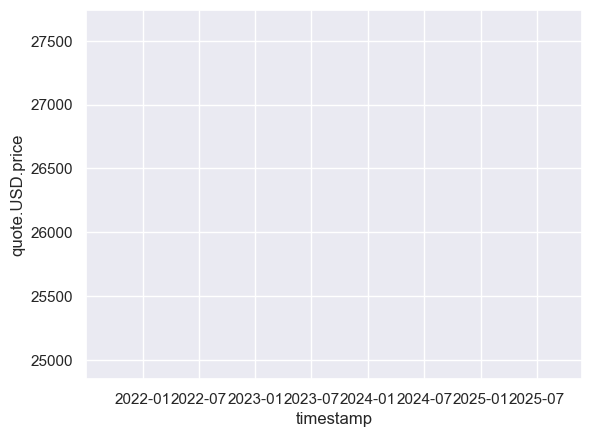

In [22]:

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)